<a href="https://colab.research.google.com/github/AimadBenzakry/ateliers_deeplearning/blob/main/Atelier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Apprentissage de fonctions booléennes

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#QST1: classifier OR
x=[[0,0],[0,1],[1,0],[1,1]]#Entrees
y = [ 0 , 1 , 1 , 1 ] # Resultats attendus

In [ ]:
classifier_or = MLPClassifier(hidden_layer_sizes=(),activation='identity',solver='lbfgs')
classifier_or.fit(x,y)

MLPClassifier(activation='identity', hidden_layer_sizes=(), solver='lbfgs')

In [ ]:
classifier_or.predict([[0,1]])

array([1])

In [ ]:
#QST2: classifier XOR
x=[[0,0],[0,1],[1,0],[1,1]]#Entrees
y = [ 0 , 1 , 1 , 0 ] # Resultats attendus

In [ ]:
classifier_xor = MLPClassifier(hidden_layer_sizes=(),activation='identity',solver='lbfgs')
classifier_xor.fit(x,y)

MLPClassifier(activation='identity', hidden_layer_sizes=(), solver='lbfgs')

In [ ]:
classifier_or.predict([[1,1]])

array([1])

On remarque que ce classifier n'a pas reussi a bien classifier toute les valeurs de l'ensemble d entrainement. En effet, il a mal classifier x=[1,1], car il doit y avoir une separation non lineaire ce qui n est pas possible avec un simple perceptron. Pour resoudre ce probleme il va falloir travailler avec un perceptron a multicouche.

In [ ]:
#b
classifier_xor_mlp = MLPClassifier(hidden_layer_sizes=(4,2),activation='identity',solver='lbfgs')
classifier_xor_mlp.fit(x,y)

MLPClassifier(activation='identity', hidden_layer_sizes=(4, 2), solver='lbfgs')

In [ ]:
classifier_xor_mlp.predict([[1,1]])

array([0])

On remarque que ce classifier a reussi a bien classifier toutes les valeurs de l'ensemble d entrainement. L'explication simple est que un perceptron est mieux placé pour faire une telle classification non lineaire.

#2. Classification des images:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,log_loss

In [ ]:
X = digits.data
y = digits.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.1, random_state=42)

In [ ]:
classifier = MLPClassifier(hidden_layer_sizes=(100, 100), random_state=1,activation='identity',solver='lbfgs',max_iter = 100)


In [ ]:
classifier.fit(X_train,y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=(100, 100),
              max_iter=100, random_state=1, solver='lbfgs')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9777777777777777

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'alpha':(100,10,1,0.1,0.01),'activation':('identity', 'logistic', 'tanh', 'relu'), 'solver':('bfgs', 'sgd', 'adam')}
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(estimator=MLPClassifier(activation='identity',
                                     hidden_layer_sizes=(100, 100),
                                     max_iter=100, random_state=1,
                                     solver='lbfgs'),
             param_grid={'activation': ('identity', 'logistic', 'tanh', 'relu'),
                         'alpha': (100, 10, 1, 0.1, 0.01),
                         'solver': ('bfgs', 'sgd', 'adam')})

In [ ]:
clf.best_params_

{'activation': 'relu', 'alpha': 0.1, 'solver': 'adam'}

In [ ]:
log_loss(y_test,clf.predict_proba(X_test))
accuracy_score(y_test,clf.predict(X_test))

0.9888888888888889

In [ ]:
model = MLPClassifier(alpha=0.01,
                      hidden_layer_sizes=(100,100),
                      activation='relu',
                      solver='adam',
                      max_iter=100,
                      early_stopping=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

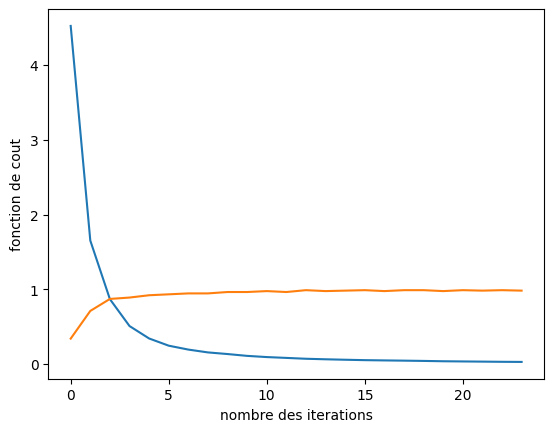

In [ ]:
plt.plot(model.loss_curve_)
plt.plot(model.validation_scores_)
plt.xlabel('nombre des iterations')
plt.ylabel('fonction de cout')
plt.show()

Dans cette partie nous avons utilie le GridSearchCv pour trouver les meilleurs parameteres qui permettent d'optimiser le MLP classifieur, ensuite nous avons utilise ces parameteres pour entrainer le MLP sur les donnees d'apprentissage et on remaque qu il y a eu une grande amelioration de la performance avec les pemieres iterations.

#3. Régression

In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving hour.csv to hour (1).csv


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np

In [150]:
#telecharger et lire les donnees
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hour.csv')

In [2]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df.corr().iloc[:, -1].sort_values(ascending=False)

<ipython-input-3-d9adb26e8b37>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().iloc[:, -1].sort_values(ascending=False)


cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

In [191]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit_transform(df[['temp','atemp','hr','instant','season','mnth','windspeed','workingday','weekday','hum']])
columns = ['temp','atemp','hr','season','mnth','windspeed','workingday','weathersit','weekday','holiday','hum']
X = df[columns]
# X['dteday']= pd.to_datetime(X['dteday'])
# X['Day'] =X['dteday'].dt.day
# X['Month'] = X['dteday'].dt.month
# X['Year'] = X['dteday'].dt.year
# X=X.drop(columns=['dteday'])
y = df['cnt']

In [178]:
X

,temp,atemp,hr,instant,season,mnth,windspeed,workingday,weekday,hum
0,0.24,0.2879,0,1,1,1,0.0000,0,6,0.81
1,0.22,0.2727,1,2,1,1,0.0000,0,6,0.80
2,0.22,0.2727,2,3,1,1,0.0000,0,6,0.80
3,0.24,0.2879,3,4,1,1,0.0000,0,6,0.75
4,0.24,0.2879,4,5,1,1,0.0000,0,6,0.75
...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.2576,19,17375,1,12,0.1642,1,1,0.60
17375,0.26,0.2576,20,17376,1,12,0.1642,1,1,0.60
17376,0.26,0.2576,21,17377,1,12,0.1642,1,1,0.60
17377,0.26,0.2727,22,17378,1,12,0.1343,1,1,0.56


In [32]:
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# scaler = StandardScaler()
# X['temp'] = scaler.fit_transform(df[['temp']])
# y = np.log(y)

In [ ]:
#X = df.iloc[:,:-1]
#y = df['cnt']

In [ ]:
#X['dteday']= pd.to_datetime(X['dteday'])

#X['Day'] =X['dteday'].dt.day
#X['Month'] = X['dteday'].dt.month
#X['Year'] = X['dteday'].dt.year
#X=X.drop(columns=['dteday'])


In [ ]:
#X=X.drop(columns=['casual','registered'])
#X.info()

In [192]:
#Split dataset into training and test
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.1, random_state=42)

In [8]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neural_network import MLPRegressor
# mlr = MLPRegressor()
# parameters = {'alpha':(100,10,1,0.1,0.01),'activation':('identity', 'logistic', 'tanh', 'relu'), 'solver':('bfgs', 'sgd', 'adam')}
# clf = GridSearchCV(mlr, parameters)
# clf.fit(X_train, y_train)
# clf.best_params_

In [193]:

model = MLPRegressor(
                      hidden_layer_sizes=(100,50),
                      activation="logistic",
                     solver='adam',
                      max_iter=1000,


                      )
model.fit(X_train,y_train)

MLPRegressor(activation='logistic', hidden_layer_sizes=(100, 50), max_iter=1000)

In [199]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rSquared = r2_score(y_test,y_pred)
print("la racine de l'erreur quadratique moyenne (rmse): ",np.sqrt(mse))
print(" R²= ",rSquared)

la racine de l'erreur quadratique moyenne (rmse):  5668.063352583133
 R²=  0.8166491430916994


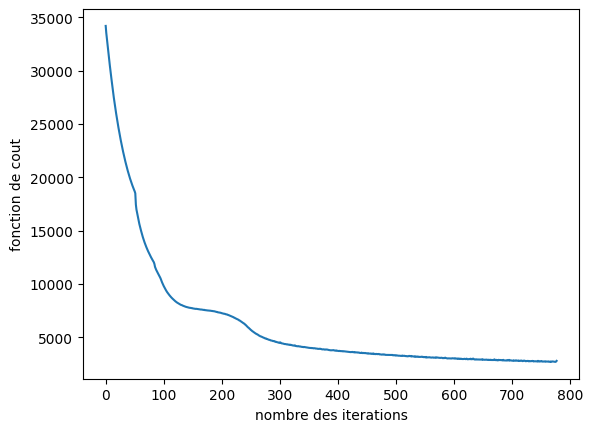

In [198]:
import matplotlib.pyplot as plt
plt.xlabel('nombre des iterations')
plt.ylabel('fonction de cout')
plt.plot(model.loss_curve_)
plt.show()